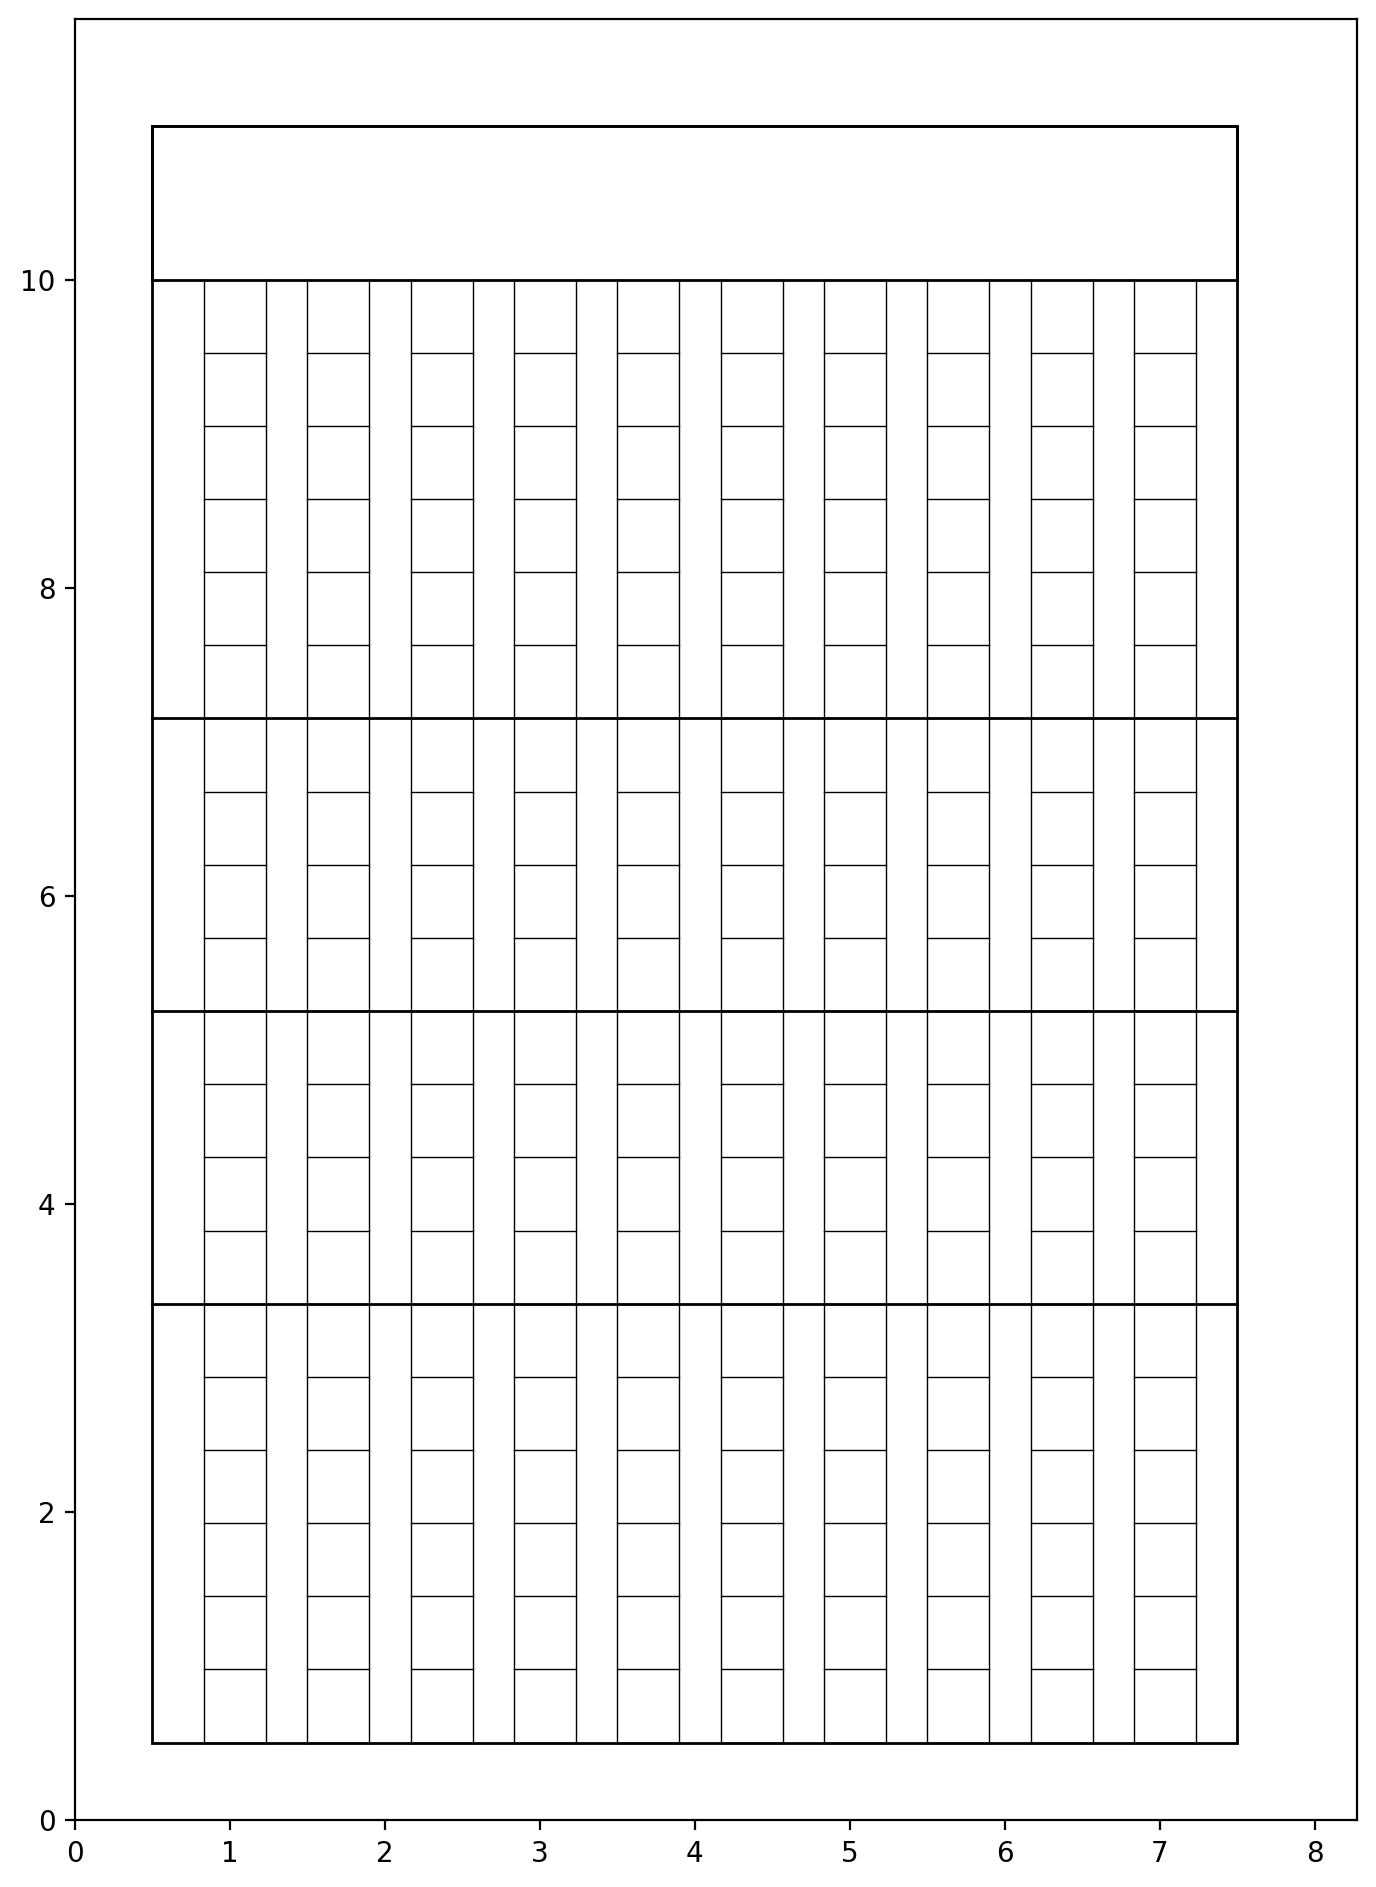

In [2]:
import matplotlib.pyplot as plt

# Create a figure and axis
page_width = 8.27
page_height = 11.69
page_left_margin = 0.5  # Left margin of the page
page_bottom_margin = 0.5  # Bottom margin of the page
num_gaks = 10
num_jeonggans_per_gak = 20 
jg_width_ratio = 1.2

fig, ax = plt.subplots(figsize=(page_width, page_height), dpi=200)  # A4 paper size in inches


# Set the limits of the plot
ax.set_xlim(0, 8.27)
ax.set_ylim(0, 11.69)

# Calculate the coordinates of the rectangle
rectangle_width = 7  # Width of the rectangle
rectangle_height = 10.5  # Height of the rectangle

rectangle_x = page_left_margin  # X-coordinate of the top-left corner of the rectangle
rectangle_y = page_bottom_margin  # Y-coordinate of the top-left corner of the rectangle

# Draw the rectangle
rectangle = plt.Rectangle((rectangle_x, rectangle_y), rectangle_width, rectangle_height, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)

# Draw upper margin block
upper_margin_height = 1
upper_margin_y = page_bottom_margin + rectangle_height - upper_margin_height
upper_margin_width = rectangle_width

upper_margin_block = plt.Rectangle((rectangle_x, upper_margin_y), upper_margin_width, upper_margin_height, edgecolor='black', facecolor='none')
ax.add_patch(upper_margin_block)


# Draw Gaks
gak_width = rectangle_width / (num_gaks * 2 + 1)
gak_positions = [rectangle_x + gak_width * (2 * i + 1) for i in range(num_gaks)]
for gak_x in gak_positions:
  # draw line from top margin_box to bottom of main rectangle
  ax.plot([gak_x, gak_x], [rectangle_y, rectangle_y + rectangle_height - upper_margin_height], color='black', linewidth=0.5)
  ax.plot([gak_x+gak_width * jg_width_ratio, gak_x+gak_width * jg_width_ratio], [rectangle_y, rectangle_y + rectangle_height - upper_margin_height], color='black', linewidth=0.5)

# Draw Daegang line 
jeonggan_height = (rectangle_height - upper_margin_height) / num_jeonggans_per_gak
jeonggan_positions = [rectangle_y + jeonggan_height * i for i in range(num_jeonggans_per_gak)]

for i, jeonggan_y in enumerate(reversed(jeonggan_positions)):
  for gak_x in gak_positions:
    ax.plot([gak_x, gak_x + gak_width*jg_width_ratio], [jeonggan_y, jeonggan_y], color='black', linewidth=0.5)
  if i in (5, 9, 13):
    ax.plot([rectangle_x, rectangle_x + rectangle_width], [jeonggan_y, jeonggan_y], color='black', linewidth=1)


# Display the plot
plt.show()


In [5]:
gak_width * jg_width_ratio, jeonggan_height

(0.39999999999999997, 0.475)

In [34]:
jeonggan_positions

[1.5,
 1.975,
 2.45,
 2.925,
 3.4,
 3.875,
 4.35,
 4.824999999999999,
 5.3,
 5.7749999999999995,
 6.25,
 6.725,
 7.199999999999999,
 7.675,
 8.149999999999999,
 8.625,
 9.1,
 9.575,
 10.049999999999999,
 10.525]